<a href="https://colab.research.google.com/github/djasantos/PhD/blob/master/Diurnal_Plots_Campinas_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import datetime as dt
# Libraries for David Hagan Code
import pandas as pd
import matplotlib
from matplotlib import dates as d
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
# Read Data from csv  
campinasDF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Doutorado/Database and Plots/Camp2py.csv')

In [ ]:
# Def functions
# Convert matlab datenum in python datetime
def mattime2py(matlab_datenum):
  dfrac = float(matlab_datenum%1)
  return dt.datetime.fromordinal(int(matlab_datenum)) + dt.timedelta(days=dfrac) - dt.timedelta(days = 366)
# Plot diurnal
def plotDiurnal(column_name,cor='k',units='Concentration (\u03BCg m$^{-3}$)',label='Diurnal Profile'):
  fig, ax = plt.subplots(1, figsize=(6,4.5))
  ax.set_title(label, fontsize=16)
  ax.set_ylabel(units, fontsize=16, weight='bold')
  ax.set_xlabel('Local Time', fontsize=14)
  ax.plot(data.index, data[column_name]['50%'], cor, linewidth=2.0, marker="o")
  ticks = ax.get_xticks()
  #ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 8))
  #ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 25), minor=True)
  ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%HH'))
  plt.tight_layout()
  ax.plot(data.index, data[column_name]['75%'], color=cor)
  ax.plot(data.index, data[column_name]['25%'], color=cor)
  ax.fill_between(data.index, data[column_name]['50%'], data[column_name]['75%'], alpha=.5, facecolor=cor)
  ax.fill_between(data.index, data[column_name]['50%'], data[column_name]['25%'], alpha=.5, facecolor=cor)
  ax.grid()
  ax.set_xlim(data.index[0],data.index[-1])
  ax.plot()

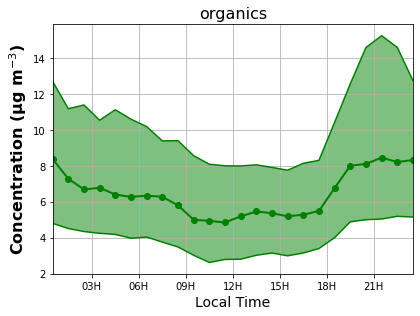

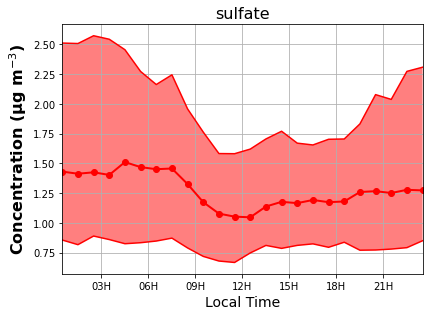

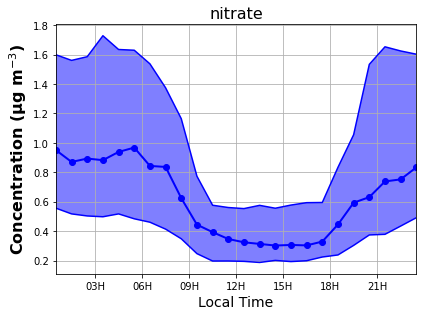

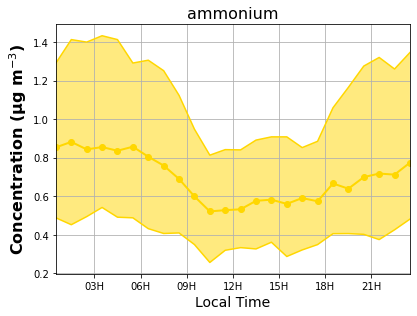

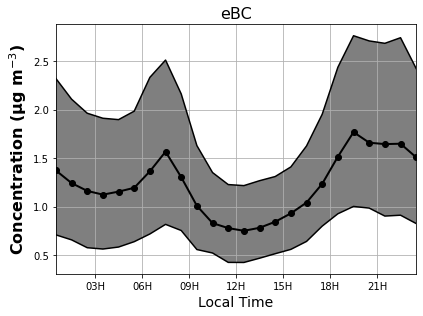

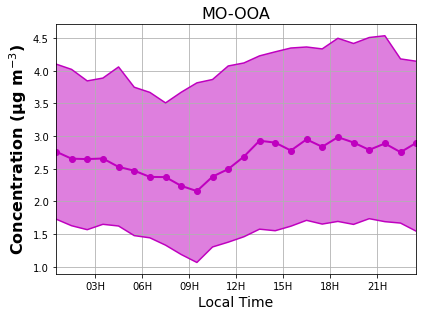

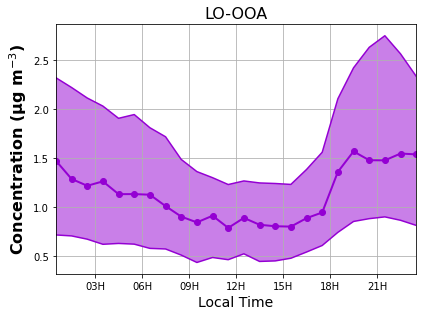

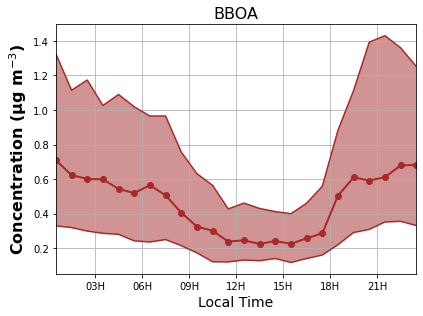

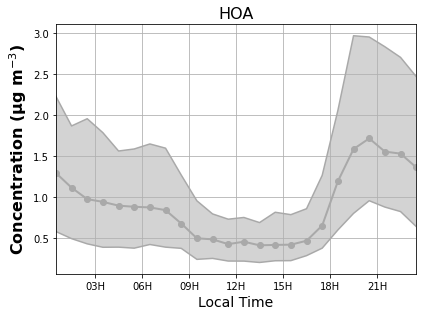

In [ ]:
campinasDF['LT'] = campinasDF['localtime'].apply(mattime2py).dt.ceil(freq='S').map(lambda x: x.replace(second=0,minute=30))
campinasDF.head()
campinasDF = campinasDF.set_index('LT')
# Create 'data' with diurnal stats (https://www.davidhagan.me/articles?id=7)
data = campinasDF
data['Time'] = data.index.map(lambda x: x.strftime("%H:%M"))
data = data.groupby('Time').describe() # remove .unstack()
data.index = pd.to_datetime(data.index.astype(str))
plotDiurnal('org','g',label='organics')
plotDiurnal('so4','r',label='sulfate')
plotDiurnal('no3','b',label='nitrate')
plotDiurnal('nh4','gold',label='ammonium')
plotDiurnal('blackcarbon','k',label='eBC')
plotDiurnal('lvooa','m',label='MO-OOA')
plotDiurnal('svooa','darkviolet',label='LO-OOA')
plotDiurnal('bboa','brown',label='BBOA')
plotDiurnal('hoa','darkgray',label='HOA')

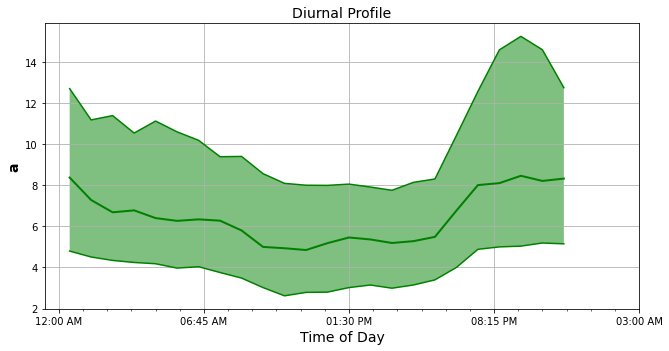

In [ ]:
  column_name = 'org'
  cor = 'g'
  units = 'a'
  fig, ax = plt.subplots(1, figsize=(9,4.5))
  ax.plot(data.index, data[column_name]['50%'], cor, linewidth=2.0)
  ticks = ax.get_xticks()
  plt.tight_layout()
  ax.plot(data.index, data[column_name]['75%'], color=cor)
  ax.plot(data.index, data[column_name]['25%'], color=cor)
  ax.fill_between(data.index, data[column_name]['50%'], data[column_name]['75%'], alpha=.5, facecolor=cor)
  ax.fill_between(data.index, data[column_name]['50%'], data[column_name]['25%'], alpha=.5, facecolor=cor)
  ax.grid()
  ax.set_title('Diurnal Profile', fontsize=14)
  ax.set_ylabel(units, fontsize=14, weight='bold')
  ax.set_xlabel('Time of Day', fontsize=14)
  ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 5))
  ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 25), minor=True)
  ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%I:%M %p'))
  plt.show()